In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import random
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.datasets import FashionMNIST

In [2]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


**1. Set Random Seed**

In [3]:
def set_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

SEED = 42
set_seed(SEED)

**2. Load FashionMNIST**

In [4]:
batch_size = 512

train_dataset = FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.2MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 166kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.17MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 5.77MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



**3. Val split and create DataLoader**

In [5]:
train_ratio = 0.9

train_size = int(train_ratio * len(train_dataset))
val_size = len(train_dataset) - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f'Train size: {len(train_dataset)}')
print(f'Val size: {len(val_dataset)}')
print(f'Test size: {len(test_dataset)}')

Train size: 54000
Val size: 6000
Test size: 10000


**4. Build model MLP**

In [6]:
# # 1. Weight Increasing
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_dim):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_size, hidden_size)
#         self.layer2 = nn.Linear(hidden_size, hidden_size)
#         self.layer3 = nn.Linear(hidden_size, hidden_size)
#         self.layer4 = nn.Linear(hidden_size, hidden_size)
#         self.layer5 = nn.Linear(hidden_size, hidden_size)
#         self.layer6 = nn.Linear(hidden_size, hidden_size)
#         self.layer7 = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_dim)

#         # for module in self.modules():
#         #     if isinstance(module, nn.Linear):
#         #         nn.init.normal_(module.weight, mean=0.0, std=1.0)
#         #         nn.init.constant_(module.bias, 0.0)

#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=10.0)
#                 nn.init.constant_(module.bias, 0.0)


#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
#         return out


# # 2. Better Activation
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_dim):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_size, hidden_size)
#         self.layer2 = nn.Linear(hidden_size, hidden_size)
#         self.layer3 = nn.Linear(hidden_size, hidden_size)
#         self.layer4 = nn.Linear(hidden_size, hidden_size)
#         self.layer5 = nn.Linear(hidden_size, hidden_size)
#         self.layer6 = nn.Linear(hidden_size, hidden_size)
#         self.layer7 = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_dim)

#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)

#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.ReLU()(x)
#         x = self.layer2(x)
#         x = nn.ReLU()(x)
#         x = self.layer3(x)
#         x = nn.ReLU()(x)
#         x = self.layer4(x)
#         x = nn.ReLU()(x)
#         x = self.layer5(x)
#         x = nn.ReLU()(x)
#         x = self.layer6(x)
#         x = nn.ReLU()(x)
#         x = self.layer7(x)
#         x = nn.ReLU()(x)
#         out = self.output(x)
#         return out

# # 4. Normalize Inside Network
# class MLP(nn.Module):
#     def __init__(self, input_size, hidden_size, output_dim):
#         super(MLP, self).__init__()
#         self.layer1 = nn.Linear(input_size, hidden_size)
#         self.layer2 = nn.Linear(hidden_size, hidden_size)
#         self.layer3 = nn.Linear(hidden_size, hidden_size)
#         self.layer4 = nn.Linear(hidden_size, hidden_size)
#         self.layer5 = nn.Linear(hidden_size, hidden_size)
#         self.layer6 = nn.Linear(hidden_size, hidden_size)
#         self.layer7 = nn.Linear(hidden_size, hidden_size)
#         self.output = nn.Linear(hidden_size, output_dim)

#         for module in self.modules():
#             if isinstance(module, nn.Linear):
#                 nn.init.normal_(module.weight, mean=0.0, std=0.05)
#                 nn.init.constant_(module.bias, 0.0)
#     def forward(self, x):
#         x = nn.Flatten()(x)
#         x = self.layer1(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer2(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer3(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer4(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer5(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer6(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         x = self.layer7(x)
#         x = nn.BatchNorm1d(self.hidden_dims)(x)
#         x = nn.Sigmoid()(x)
#         out = self.output(x)
#         return out

# class MyNormalization(nn.Module):
#     def __init__(self):
#         super().__init__()

#     def forward(self, x):
#         mean = torch.mean(x)
#         std = torch.std(x)
#         x = (x - mean) / std
#         return x


# 5. Skip Connection
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_dim):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, hidden_size)
        self.layer3 = nn.Linear(hidden_size, hidden_size)
        self.layer4 = nn.Linear(hidden_size, hidden_size)
        self.layer5 = nn.Linear(hidden_size, hidden_size)
        self.layer6 = nn.Linear(hidden_size, hidden_size)
        self.layer7 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_dim)

        for module in self.modules():
            if isinstance(module, nn.Linear):
                nn.init.normal_(module.weight, mean=0.0, std=0.05)
                nn.init.constant_(module.bias, 0.0)

    def forward(self, x):
        x = nn.Flatten()(x)
        x = self.layer1(x)
        x = nn.Sigmoid()(x)
        skip = x

        x = self.layer2(x)
        x = nn.Sigmoid()(x)
        x = self.layer3(x)
        x = nn.Sigmoid()(x)
        x = skip + x

        x = self.layer4(x)
        x = nn.Sigmoid()(x)
        skip = x

        x = self.layer5(x)
        x = nn.Sigmoid()(x)
        x = self.layer6(x)
        x = nn.Sigmoid()(x)
        x = self.layer7(x)
        x = nn.Sigmoid()(x)
        x = skip + x

        out = self.output(x)
        return out

# 6. Gradient Normalization
'''
class GradientNormalization(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input

    @staticmethod
    def backward(ctx, grad_output):
        mean = torch.mean(grad_output)
        std = torch.std(grad_output)
        grad_input = (grad_output - mean) / (std + 1e-6)
        return grad_input

class GradientNormalizationLayer(nn.Module):
    def __init__(self):
        super(GradientNormalizationLayer, self).__init__()

    def forward(self, x):
        return GradientNormalization.apply(x)
'''

In [7]:
# input_dims = 784
# hidden_dims = 128
# output_dims = 10
# lr = 1e-2

# model = MLP(input_dims, hidden_dims, output_dims).to(device)

# criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=lr)

# 3. Better Optimizer
input_dims = 784
hidden_dims = 128
output_dims = 10
lr = 1e-3

model = MLP(input_dims, hidden_dims, output_dims).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

#### **5. Training Model**

In [8]:
epochs = 100
train_losses = []
val_losses = []
train_accs = []
val_accs = []

for epoch in range(epochs):
    train_loss = 0.0
    train_acc = 0.0
    count = 0
    model.train()
    for X_train, y_train in train_loader:
        X_train = X_train.to(device)
        y_train = y_train.to(device)
        optimizer.zero_grad()

        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        train_acc += (torch.argmax(outputs, 1) == y_train).sum().item()
        count += len(y_train)

    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    train_acc /= count
    train_accs.append(train_acc)

    val_loss = 0.0
    val_acc = 0.0
    count = 0
    model.eval()
    with torch.no_grad():
        for X_val, y_val in val_loader:
            X_val = X_val.to(device)
            y_val = y_val.to(device)

            outputs = model(X_val)
            loss = criterion(outputs, y_val)
            val_loss += loss.item()
            val_acc += (torch.argmax(outputs, 1) == y_val).sum().item()
            count += len(y_val)

    val_loss /= len(val_loader)
    val_losses.append(val_loss)
    val_acc /= count
    val_accs.append(val_acc)

    print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

Epoch 1/100, Train Loss: 1.6910, Train Acc: 0.4290, Val Loss: 1.0594, Val Acc: 0.5533
Epoch 2/100, Train Loss: 0.8332, Train Acc: 0.6868, Val Loss: 0.6875, Val Acc: 0.7503
Epoch 3/100, Train Loss: 0.5971, Train Acc: 0.7795, Val Loss: 0.5556, Val Acc: 0.8008
Epoch 4/100, Train Loss: 0.5007, Train Acc: 0.8213, Val Loss: 0.4947, Val Acc: 0.8318
Epoch 5/100, Train Loss: 0.4506, Train Acc: 0.8405, Val Loss: 0.4690, Val Acc: 0.8343
Epoch 6/100, Train Loss: 0.4152, Train Acc: 0.8536, Val Loss: 0.4209, Val Acc: 0.8552
Epoch 7/100, Train Loss: 0.3919, Train Acc: 0.8597, Val Loss: 0.4117, Val Acc: 0.8568
Epoch 8/100, Train Loss: 0.3701, Train Acc: 0.8663, Val Loss: 0.4088, Val Acc: 0.8537
Epoch 9/100, Train Loss: 0.3564, Train Acc: 0.8718, Val Loss: 0.3987, Val Acc: 0.8583
Epoch 10/100, Train Loss: 0.3441, Train Acc: 0.8747, Val Loss: 0.3804, Val Acc: 0.8613
Epoch 11/100, Train Loss: 0.3315, Train Acc: 0.8802, Val Loss: 0.3708, Val Acc: 0.8685
Epoch 12/100, Train Loss: 0.3210, Train Acc: 0.8836,

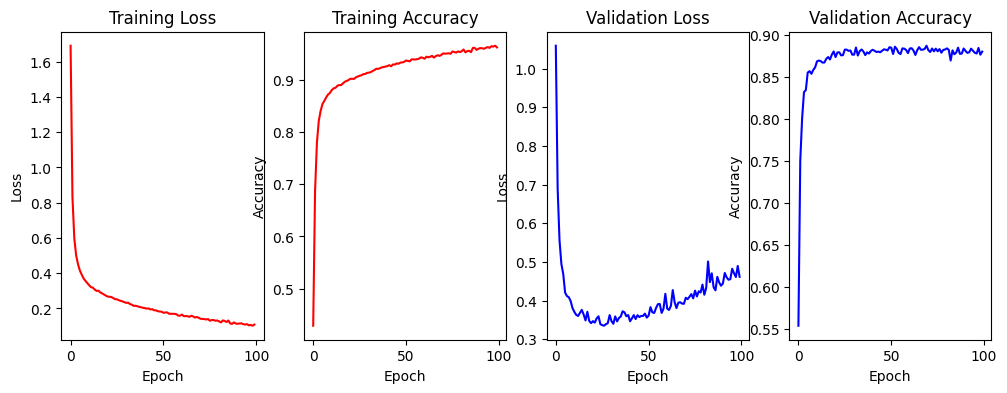

In [9]:
fig, ax = plt.subplots(1, 4, figsize=(12, 4))
ax[0].plot(train_losses, color='red')
ax[0].set(xlabel='Epoch', ylabel='Loss', title='Training Loss')

ax[1].plot(train_accs, color='red')
ax[1].set(xlabel='Epoch', ylabel='Accuracy', title='Training Accuracy')

ax[2].plot(val_losses, color='blue')
ax[2].set(xlabel='Epoch', ylabel='Loss', title='Validation Loss')

ax[3].plot(val_accs, color='blue')
ax[3].set(xlabel='Epoch', ylabel='Accuracy', title='Validation Accuracy')

plt.show()

#### **6. Evaluation**

In [10]:
test_pred = []
test_target = []

model.eval()
with torch.no_grad():
    for X_test, y_test in test_loader:
        X_test = X_test.to(device)
        y_test = y_test.to(device)
        outputs = model(X_test)

        test_target.append(y_test.cpu())
        test_pred.append(outputs.cpu())

    test_pred = torch.cat(test_pred)
    test_target = torch.cat(test_target)
    test_acc = (torch.argmax(test_pred, 1) == test_target).sum().item() / len(test_target)

print(f'Accuracy on test set: {test_acc:.4f}')


Accuracy on test set: 0.8810
